In [0]:
from google.colab import drive
drive.mount('/content/drive')

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam, SGD

Using TensorFlow backend.


In [5]:
df = pd.read_csv('/content/drive/My Drive/Google Colab/Neural Network/Keras/My_Code_Keras/HR_comma_sep.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
sales                    14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [8]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [6]:
df.left.value_counts() / len(df) # What would be the accuracy score

0    0.761917
1    0.238083
Name: left, dtype: float64

In [8]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'sales', 'salary'],
      dtype='object')

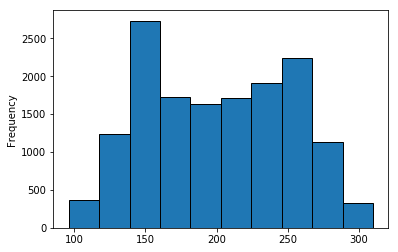

In [10]:
df['average_montly_hours'].plot(edgecolor='black', kind='hist')

In [15]:
print("max :\t",max(df['average_montly_hours']))
print("min :\t",min(df['average_montly_hours']))

max :	 310
min :	 96


In [0]:
df['average_montly_hours_100'] = df['average_montly_hours']/100.0

In [18]:
print("max :\t",max(df['average_montly_hours_100']))
print("min :\t",min(df['average_montly_hours_100']))

max :	 3.1
min :	 0.96


In [0]:
df_dummies = pd.get_dummies(df[['sales', 'salary']]) # categorical data to binary representation

In [6]:
print("Sales column has : ",df['sales'].unique())
print("Salary column has : ",df['salary'].unique())

Sales column has :  ['sales' 'accounting' 'hr' 'technical' 'support' 'management' 'IT'
 'product_mng' 'marketing' 'RandD']
Salary column has :  ['low' 'medium' 'high']


In [20]:
df_dummies.head()

,sales_IT,sales_RandD,sales_accounting,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical,salary_high,salary_low,salary_medium
0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,1,0,0,0,0,1
2,0,0,0,0,0,0,0,1,0,0,0,0,1
3,0,0,0,0,0,0,0,1,0,0,0,1,0
4,0,0,0,0,0,0,0,1,0,0,0,1,0


In [21]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'sales', 'salary', 'average_montly_hours_100'],
      dtype='object')

In [0]:
x = pd.concat([df[['satisfaction_level', 'last_evaluation','number_project', 'time_spend_company', 
                  'Work_accident', 'promotion_last_5years', 'average_montly_hours_100']]
              , df_dummies], axis=1).values

y = df['left'].values

In [26]:
x.shape

(14999, 20)

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [0]:
model = Sequential()
model.add(Dense(1, input_dim=20, activation='sigmoid'))
model.compile(Adam(lr=0.5), 'binary_crossentropy', metrics=['accuracy'])

In [31]:
model.summary() # 20 features 1 bias

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 1)                 21        
Total params: 21
Trainable params: 21
Non-trainable params: 0
_________________________________________________________________


In [34]:
model.fit(x_train, y_train, epochs=20)

Epoch 1/20
11999/11999 [==============================] - 1s 106us/step - loss: 0.5385 - acc: 0.7653
Epoch 2/20
11999/11999 [==============================] - 1s 107us/step - loss: 0.5354 - acc: 0.7653
Epoch 3/20
11999/11999 [==============================] - 1s 101us/step - loss: 0.5359 - acc: 0.7667
Epoch 4/20
11999/11999 [==============================] - 1s 106us/step - loss: 0.5651 - acc: 0.7580
Epoch 5/20
11999/11999 [==============================] - 1s 105us/step - loss: 0.5313 - acc: 0.7648
Epoch 6/20
11999/11999 [==============================] - 1s 109us/step - loss: 0.5690 - acc: 0.7604
Epoch 7/20
11999/11999 [==============================] - 1s 106us/step - loss: 0.5282 - acc: 0.7655
Epoch 8/20
11999/11999 [==============================] - 1s 107us/step - loss: 0.5374 - acc: 0.7660
Epoch 9/20
11999/11999 [==============================] - 1s 117us/step - loss: 0.5506 - acc: 0.7648
Epoch 10/20
11999/11999 [==============================] - 1s 107us/step - loss: 0.5464 - a

<h2><center>Confusion Matrix

In [0]:
y_test_pred = model.predict_classes(x_test)

In [0]:
from sklearn.metrics import confusion_matrix, classification_report

In [0]:
def pretty_confusion_matrix(y, y_pred, labels=["False" ,"True"]):
  cm = confusion_matrix(y, y_pred)
  pred_lebels = ['Predicted '+ l for l in labels]
  df = pd.DataFrame(cm, index=labels, columns=pred_lebels)
  return df

In [38]:
pretty_confusion_matrix(y_test, y_test_pred, labels=['Stay', 'Leave'])

,Predicted Stay,Predicted Leave
Stay,1903,396
Leave,269,432


In [39]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.88      0.83      0.85      2299
           1       0.52      0.62      0.57       701

    accuracy                           0.78      3000
   macro avg       0.70      0.72      0.71      3000
weighted avg       0.79      0.78      0.78      3000



<h2><center>Cross Validation

In [0]:
from keras.wrappers.scikit_learn import KerasClassifier

In [0]:
def build_logistic_regration_model():
  model = Sequential()
  model.add(Dense(1, input_dim=20, activation='sigmoid'))
  model.compile(Adam(lr=0.5), 'binary_crossentropy', metrics=['accuracy'])
  return model

In [0]:
model = KerasClassifier(build_fn=build_logistic_regration_model, epochs=10, verbose=0)

In [0]:
from sklearn.model_selection import KFold, cross_val_score

In [45]:
cv = KFold(5, shuffle=True)
scores = cross_val_score(model, x, y, cv=cv)
scores

array([0.79533333, 0.784     , 0.75533333, 0.78133333, 0.75358453])

In [46]:
print("Cross validation accuracy is : {:0.4f}".format(scores.mean()),"± {:0.4f}".format(scores.std()))

Cross validation accuracy is : 0.7739 ± 0.0166
